In [2]:
#import pybedtools

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from scipy.stats import pearsonr, spearmanr
import glob

# Read Data

In [7]:
def flatten_tissues_expand_df(tfbs_df):
    tfbs_part_repeat = tfbs_df.iloc[:,:9]
    tfbs_part_flatten = tfbs_df.iloc[:,9:]
    
    repeat_df =  pd.DataFrame(np.repeat(tfbs_part_repeat.values, tfbs_part_flatten.shape[1], axis=0))
    flatten_arr = tfbs_part_flatten.to_numpy().flatten()

    tissue_repeat = np.tile(np.array(tfbs_part_flatten.columns), len(tfbs_part_repeat))
    
    repeat_df.columns = tfbs_part_repeat.columns
    repeat_df["GeneExpr"] = flatten_arr
    repeat_df["Tissue"] = tissue_repeat
    

    return repeat_df

In [35]:
path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS.csv"
#path = r"H:\Uni - iCloud - Alte Semester\BA\All_TFBS.csv"
df_combined = pd.read_csv(path)


,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,Adipose - Subcutaneous,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,0.691,...,1.121,0.967,1.650,2.041,1.969,2.102,1.274,2.616,4285.500,0.483
1,chr1,ENSG00000143569.18,HMBOX1,9,19,T,1,12,11,50.840,...,49.715,53.410,35.470,39.380,26.340,65.410,60.040,65.595,55.225,17.250
2,chr10,ENSG00000213390.10,HMBOX1,47,57,nT,1,73,55,7.477,...,9.733,9.144,8.263,20.150,4.508,32.780,6.792,10.970,8.785,7.745
3,chr1,ENSG00000169241.17,HMBOX1,160,170,nT,1,115,81,31.560,...,41.695,40.380,46.890,52.560,33.060,22.880,46.590,30.335,32.340,18.380
4,chr1,ENSG00000185499.16,HMBOX1,173,183,nT,1,23,20,5.235,...,6.015,6.711,9.300,3.004,362.500,36.160,28.620,21.455,22.830,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700911,chr7,ENSG00000105851.10,STAT5B,-3,8,T,1,33,32,1.200,...,0.251,0.280,2.243,5.790,0.574,4.966,0.878,0.607,0.433,7.502
700912,chr7,ENSG00000075790.10,STAT5B,124,135,nT,1,31,26,20.870,...,12.365,11.990,8.953,9.601,8.210,30.260,37.430,29.180,21.870,2.035
700913,chr7,ENSG00000128590.4,STAT5B,54,69,T,1,71,59,25.350,...,19.705,16.970,20.790,25.160,24.560,53.610,42.800,36.135,23.670,8.608
700914,chr7,ENSG00000198839.9,STAT5B,56,71,nT,1,122,89,10.450,...,10.200,9.264,6.335,6.266,7.490,7.119,9.892,10.200,10.480,3.083


In [9]:
flat_df = flatten_tissues_expand_df(df_combined)

Variance between Tissues

In [64]:
# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)

# Plot

## Relationship between TSS-TFBS distance, Geneexpression and strand orientation 

Chr22, JUN

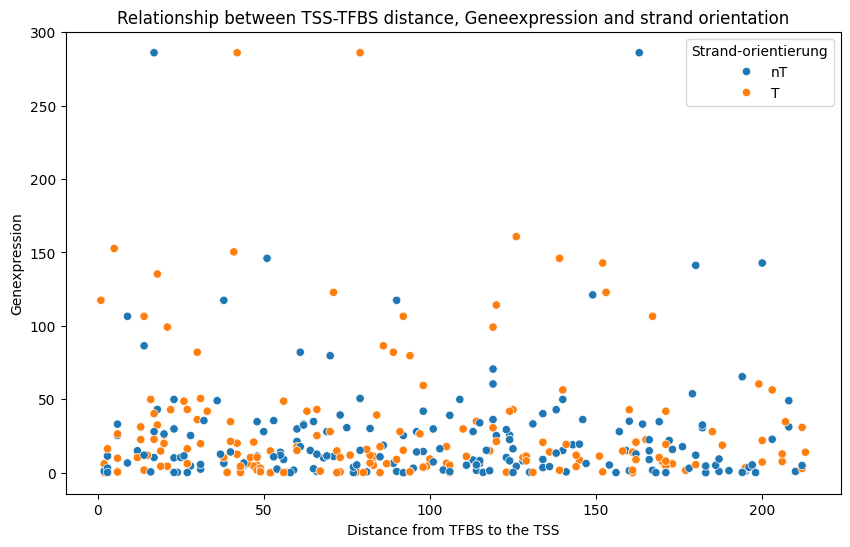

In [36]:
#ChatGPT, Plot der die Beziehung zwischen der Entfernung der TFBS zum TSS und dem Genexpressionswert für verschiedene Strandorientierungen darstellt:
df = df_combined[(df_combined["chr"]=="chr22") & (df_combined["tf"]=="ESR1")]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist_tss', y='Stomach', hue='strand_orientation')
plt.xlabel('Distance from TFBS to the TSS')
plt.ylabel('Genexpression')
plt.title('Relationship between TSS-TFBS distance, Geneexpression and strand orientation')
plt.legend(title='Strand-orientierung')
plt.show()

In [68]:
flat_df

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,GeneExpr,Tissue
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,0.691,Adipose - Subcutaneous
1,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.043,Adipose - Visceral (Omentum)
2,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.906,Adrenal Gland
3,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.397,Artery - Aorta
4,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.385,Artery - Coronary
...,...,...,...,...,...,...,...,...,...,...,...
37849459,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,2.226,Testis
37849460,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,7.504,Thyroid
37849461,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,11.100,Uterus
37849462,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,6.597,Vagina


In [155]:
# Heatmap to mao geneexpression values for each TF and each Tissue

pivot_df = flat_df.pivot_table(index="tf", columns="Tissue", values="GeneExpr")


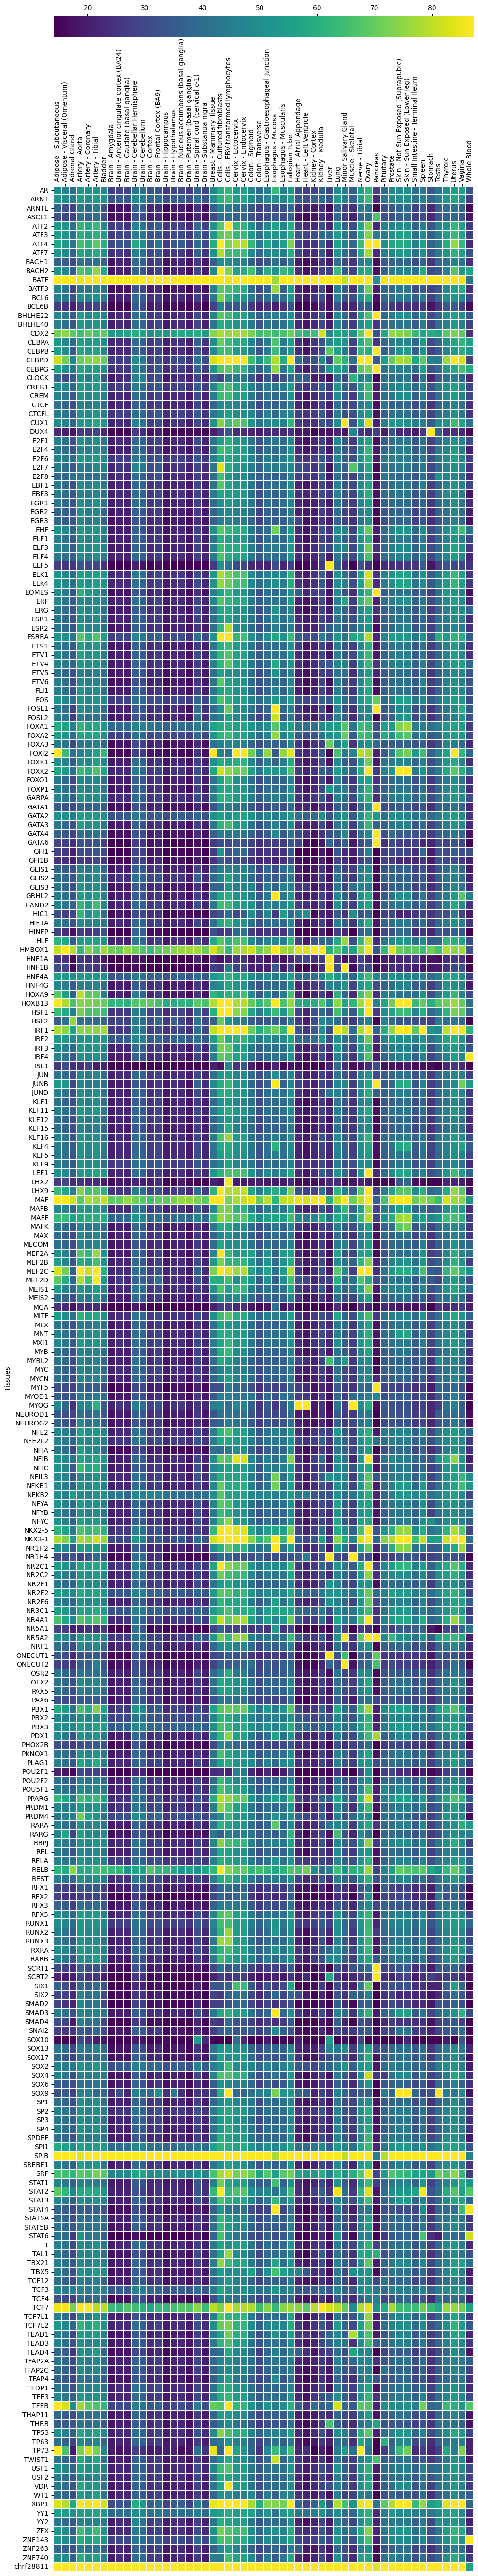

In [204]:
value_max = max(pivot_df.max())
value_min = min(pivot_df.min())

fig, ax = plt.subplots(figsize=(10, 62))
heatmap = sns.heatmap(pivot_df,cmap="viridis", fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top"}, robust=True)
#plt.title('Genexpression in different tissues')
plt.xlabel('TFBS')
plt.ylabel('Tissues')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/GenExr_diffrent_tissue_all_TFBS_ROBUST.png")
plt.show()



In [13]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots()
#ax.set_xscale("log", base=2)

sns.relplot(flat_df, x="close_tss", y="All_tissues", hue="Tissue")


ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_ylabel("Gene Expression")
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Genexpression_All_TFBS.png")
plt.show()

AttributeError: module 'matplotlib.cbook' has no attribute '_safe_first_finite'

<Figure size 432x288 with 0 Axes>